In [1]:
#!conda install pytorch torchvision torchaudio cpuonly -c pytorch -y
#!conda install matplotlib numpy ipympl -y
#!conda install conda-forge::pytorch-model-summary -y#
#!conda install matplotlib numpy ipympl -y
#!conda install conda-forge::pytorch-lightning -y 
#!conda install conda-forge::lightning -y

In [2]:
from torch.utils.cpp_extension import load
import torch
import matplotlib.pyplot as plt
import numpy as np

%matplotlib widget

#Compile the c++ module
pid_dataset = load(name="PIDDataset",
                   sources=["PidDataset.cpp","ReadRawData.cpp","ReadBinaryData.cpp", "mwdlib.cpp"],
                   verbose=True,
                   extra_cflags=['-O3'],
                  )

Using /home/luna/.cache/torch_extensions/py311_cu118 as PyTorch extensions root...
Emitting ninja build file /home/luna/.cache/torch_extensions/py311_cu118/PIDDataset/build.ninja...
Building extension module PIDDataset...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)


ninja: no work to do.


Loading extension module PIDDataset...


In [21]:
#Load the dataset
#dataset = pid_dataset.PIDDataset(root="./DataFusEvSauron/RU_caendig_i1468_0005_0000.caendat", 
#                                 mode=pid_dataset.kTrain, 
#                                 count=5000, 
#                                 nder=2,
#                                 nsamples=128, 
#                                 firstsample=0, 
#                                 nchannels=64, 
#                                 normalized=True)

#dataset = pid_dataset.PIDDataset(root="./DataLiFOscar/RU_caendig_i1784_1021_0001.caendat", 
#                                 mode=pid_dataset.kTrain, 
#                                 count=500, 
#                                 #count=709_756, 
#                                 nder=2,
#                                 nsamples=40, 
#                                 firstsample=200, 
#                                 nchannels=16, 
#                                 normalized=True)

dataset = pid_dataset.PIDDataset(root="./Fazia/Signal_and_IdCal_221.dat", 
                                 mode=pid_dataset.kTrain, 
                                 count=100, 
                                 #count=709_756, 
                                 nder=2,
                                 nsamples=30, 
                                 firstsample=20, 
                                 normalized=False,
                                 discardenergies=False,
                                 minenergy=0.,
                                maxenergy=1000)

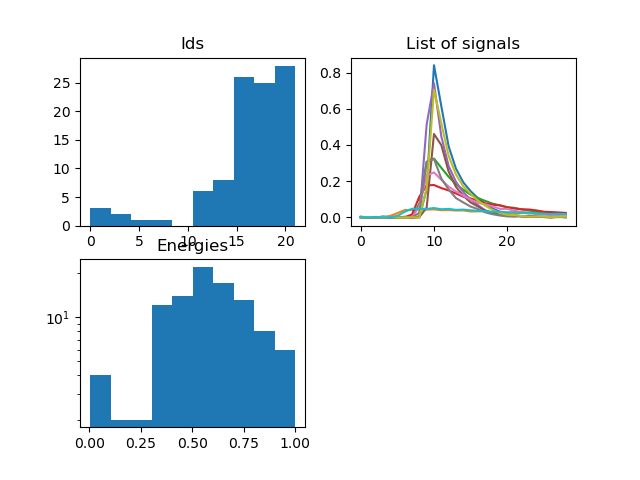

In [22]:
#Check the data
plt.clf()
plt.subplot(221)
plt.title("Ids")
plt.hist(dataset.ids().numpy())

plt.subplot(222)
plt.title("List of signals")
for i in range(0,10):
    #print(dataset.signals().numpy()[i][0][0][:-2])
    plt.plot(dataset.signals().numpy()[i][0][0][:-2])

ax = plt.subplot(223)
plt.title("Energies")
plt.hist(dataset.signals().numpy()[:,0,0,-1], bins="auto")
ax.set_yscale('log')
#
#print(np.max(dataset.energies().numpy()))
#print(np.min(dataset.energies().numpy()))
#plt.subplot(224)
#plt.title("First derivative of signals")
#for i in range(0,100):
#    plt.plot(dataset.images().numpy()[i][0][1])
plt.show()

In [5]:
print(dataset.signals().numpy().shape)

(30, 1, 2, 100)


In [6]:
print(dataset.signals().numpy()[0][0][0])

[ 0.00065104 -0.00065104 -0.00065104  0.00065104 -0.00195312  0.
  0.         -0.00065104  0.00195312 -0.00130208 -0.00065104  0.00130208
 -0.00065104  0.00065104 -0.00065104 -0.00065104  0.00065104  0.00260417
 -0.00455729  0.00195312  0.00195312  0.          0.00065104 -0.00130208
  0.00716146  0.02278646  0.03971354  0.04036458  0.04296875  0.04231771
  0.04361979  0.0390625   0.04036458  0.03710938  0.03776042  0.03190104
  0.03255208  0.03320312  0.02473958  0.02929688  0.02539062  0.02278646
  0.02408854  0.02213542  0.02083333  0.01822917  0.01822917  0.01822917
  0.01757812  0.01822917  0.01627604  0.01236979  0.01302083  0.01236979
  0.01302083  0.01367188  0.01106771  0.00911458  0.01106771  0.00846354
  0.00846354  0.00911458  0.00651042  0.00520833  0.00911458  0.00716146
  0.00585938  0.00455729  0.00390625  0.00651042  0.00455729  0.00390625
  0.00455729  0.00325521  0.00195312  0.00520833  0.00260417  0.00585938
 -0.00065104  0.00260417  0.00325521  0.00065104  0.0013020